In [1]:
# import packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.stats as sms
import statsmodels.stats.api as smss
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# create a common alpha for Bonferroni Correction
alpha =  0.003/36

# zTest Function
# requires original dataframe (df), group 1 (df1), group2 (df2), variable to be tested (column), alpha for confidence intervals (alpha)
def zTest(df,df1,df2,column, alpha):
    #use stats models ztests on the two groups
    z, p = sms.weightstats.ztest(df1[column],df2[column],alternative ='two-sided', usevar='pooled')
    # print if the means are significantly different
    if p<= alpha:
        print('***The Groups Have Different Means***')
    
    # print probability of groups sharing a mean
    print('Probablility They Have Same Mean: ', round(p,5))
    
    # print confidence interval
    t = smss.CompareMeans(smss.DescrStatsW(df1[column]),smss.DescrStatsW(df2[column])).tconfint_diff(usevar='pooled', alpha =alpha)
    print('Range of True Difference in Means: (',round(t[0],3),':', round(t[1],3),')')

# list diffence function that returns items in first list that are not in second list 
def listDiff(first, second):
    second = set(second)
    return [item for item in first if item not in second]


In [3]:
# import data
df = pd.read_csv('BGVSpringboardData.csv')

In [4]:
#Set TourID to index
df= df.set_index('TourID_dimension')

# create dictionary to change binary categorical output variable to an integer
dic={'Sale':1.0,'No Sale':0.0}

# convert categorical output variable to binary
df['ResultOfTour']=df['ResultOfTour'].replace(dic)
print(df.info())

dfSale = df[df['ResultOfTour']==1.0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25777 entries, 109662 to 385812
Data columns (total 17 columns):
?TourGeneration               25777 non-null int64
Age                           25777 non-null int64
AgentLine                     25777 non-null object
BookingWindow                 25777 non-null object
FirstGenVsOwner               25777 non-null object
HHIncomeRanges                25777 non-null object
Homeowner                     25777 non-null object
InState                       25777 non-null object
Month of TourDate             25777 non-null object
Programs (Budget)             25777 non-null object
relationStatus                25777 non-null object
ResultOfTour                  25777 non-null float64
TourContractGeneration        25777 non-null int64
TourSeason                    25777 non-null object
WeekdayOrWeekend              25777 non-null object
Year of TourDate              25777 non-null int64
NetVolumePlusNonGoodVolume    25777 non-null float64
dty

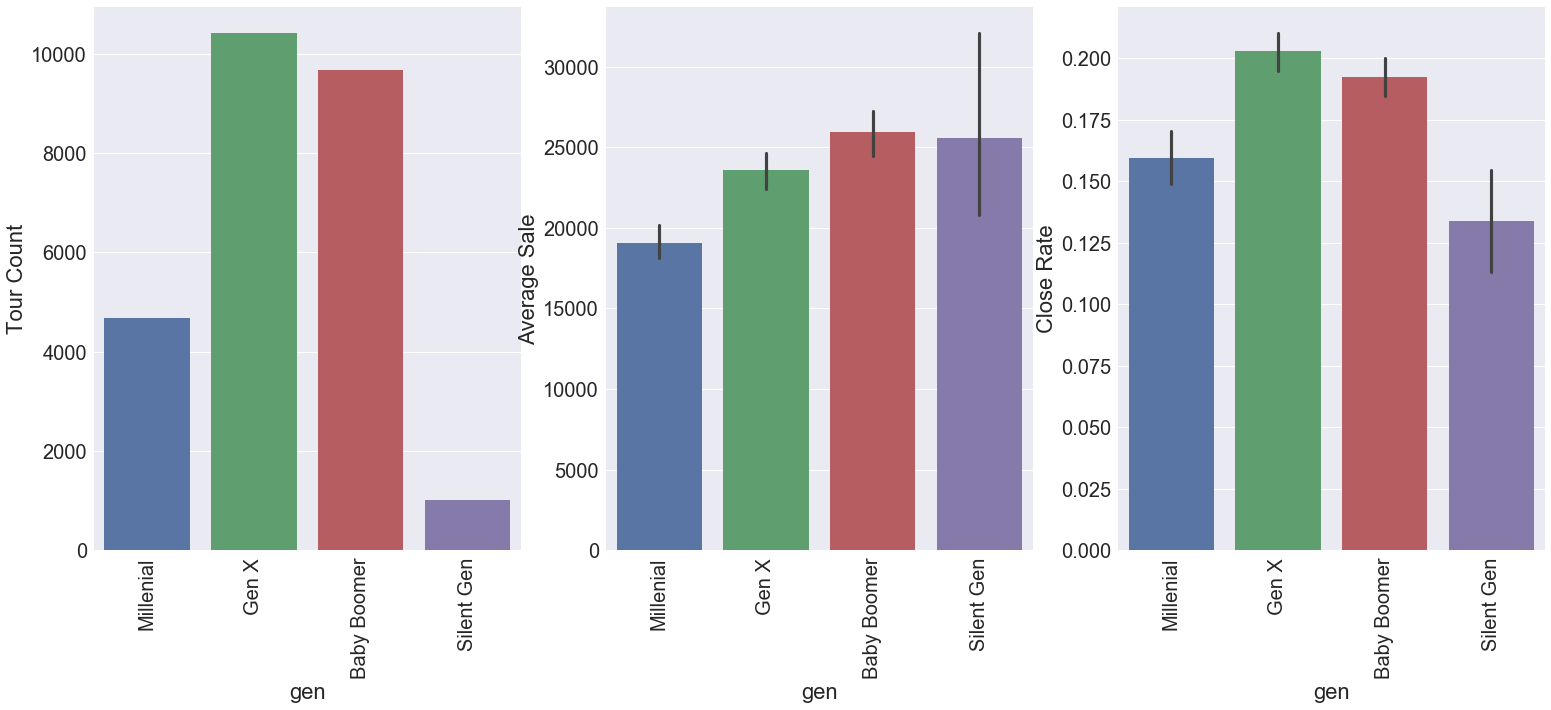

Millenials vs Other Generations Differences in Average Sale:
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -9787.502 : -1433.128 )

Millenials vs Other Generations Differences in Close Rate:
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -0.06 : -0.01 )

---------------------------------------------------------------------
Gen X vs Other Generations Differences in Average Sale:
Probablility They Have Same Mean:  0.52944
Range of True Difference in Means: ( -3530.384 : 2558.103 )

Gen X vs Other Generations Differences in Close Rate:
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.005 : 0.044 )

---------------------------------------------------------------------
Baby Boomers vs Other Generations Differences in Average Sale:
***The Groups Have Different Means***
Probablility They Have S

In [5]:
# create generation bins
age_dic = dict([(n, 'Millenial')for n in range(20, 38)] +
[(n, 'Gen X')for n in range(38, 54)] +
[(n, 'Baby Boomer')for n in range(54, 73)] +
[(n, 'Silent Gen')for n in range(73, 91)])
df['gen'] = df.Age.replace(age_dic)
dfSale['gen'] = dfSale.Age.replace(age_dic)
#increase  figure size
mpl.rcParams['figure.figsize'] = (26,10)
sns.set(font_scale = 2)

#create countplot of number of tours for each generation
plt.subplot(1,3,1)
sns.countplot(x= 'gen',data=df, order = ['Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by generation
plt.subplot(1,3,2)
sns.barplot(x= 'gen',y= 'NetVolumePlusNonGoodVolume',data=dfSale, order = ['Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'])
plt.xticks(rotation=90)
plt.ylabel('Average Sale')

#create barplot of close rate by generation
plt.subplot(1,3,3)
sns.barplot(x= 'gen',y= 'ResultOfTour',data=df, order = ['Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.show()

#create millenial and non millenial groups
dfMillenials = df[df.Age < 38]
dfNotMillenials = df[df.Age >= 38]

dfMillenialsS = dfSale[dfSale.Age < 38]
dfNotMillenialsS = dfSale[dfSale.Age >= 38]

#compare millenial and non millenial groups with z test
print('Millenials vs Other Generations Differences in Average Sale:')
zTest(df,dfMillenialsS,dfNotMillenialsS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Millenials vs Other Generations Differences in Close Rate:')
zTest(df,dfMillenials,dfNotMillenials, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

#create genx and non genx groups with z test
dfGenX = df[(df.Age >= 38) & (df.Age < 54 )]
dfNotGenX = df[(df.Age < 38) | (df.Age >= 54)]

dfGenXS = dfSale[(dfSale.Age >= 38) & (dfSale.Age < 54 )]
dfNotGenXS = dfSale[(dfSale.Age < 38) | (dfSale.Age >= 54)]

#compare genx and non genx groups
print('Gen X vs Other Generations Differences in Average Sale:')
zTest(df,dfGenXS,dfNotGenXS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Gen X vs Other Generations Differences in Close Rate:')
zTest(df,dfGenX,dfNotGenX, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

# create Baby Boomer and non Baby Boomer groups
dfBB = df[(df.Age >= 54) & (df.Age < 73 )]
dfNotBB = df[(df.Age < 54) | (df.Age >= 73)]

dfBBS = dfSale[(dfSale.Age >= 54) & (dfSale.Age < 73 )]
dfNotBBS = dfSale[(dfSale.Age < 54) | (dfSale.Age >= 73)]

# compare Baby Boomer and non Baby Boomer groups with z test
print('Baby Boomers vs Other Generations Differences in Average Sale:')
zTest(df,dfBBS,dfNotBBS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Baby Boomers vs Other Generations Differences in Close Rate:')
zTest(df,dfBB,dfNotBB, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

# create Silent Gen and non Silent Gen groups
dfSG = df[(df.Age >= 73) ]
dfNotSG = df[(df.Age < 73)]

dfSGS = dfSale[(dfSale.Age >= 73) ]
dfNotSGS = dfSale[(dfSale.Age < 73)]

# compare Silent Gen and non Silent Gen groups with z test
print('Silent Gen vs Other Generations Differences in Average Sale:')
zTest(df,dfSGS,dfNotSGS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Silent Gen vs Other Generations Differences in Close Rate:')
zTest(df,dfSG,dfNotSG, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

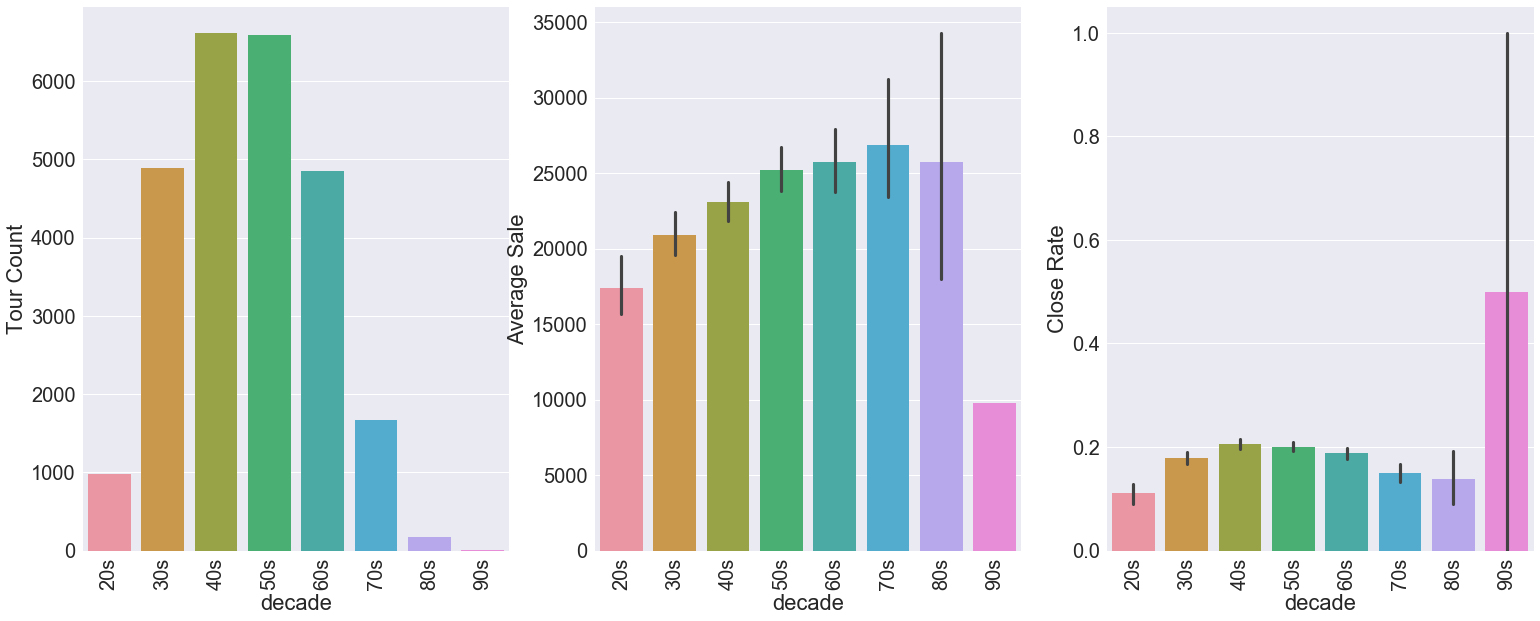

In [6]:
# create generation bins
age_dic = dict([(n, '20s')for n in range(20, 30)] +
[(n, '30s')for n in range(30, 40)] +
[(n, '40s')for n in range(40, 50)] +
[(n, '50s')for n in range(50, 60)]+
[(n, '60s')for n in range(60, 70)]+
[(n, '70s')for n in range(70, 80)]+
[(n, '80s')for n in range(80, 90)]+
[(n, '90s')for n in range(90, 100)])
df['decade'] = df.Age.replace(age_dic)
dfSale['decade'] = dfSale.Age.replace(age_dic)
#increase  figure size
mpl.rcParams['figure.figsize'] = (26,10)
sns.set(font_scale = 2)

#create countplot of number of tours for each generation
plt.subplot(1,3,1)
sns.countplot(x= 'decade',data=df, order = ['20s','30s','40s','50s','60s','70s','80s','90s'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by generation
plt.subplot(1,3,2)
sns.barplot(x= 'decade',y= 'NetVolumePlusNonGoodVolume',data=dfSale, order = ['20s','30s','40s','50s','60s','70s','80s','90s'])
plt.xticks(rotation=90)
plt.ylabel('Average Sale')

#create barplot of close rate by generation
plt.subplot(1,3,3)
sns.barplot(x= 'decade',y= 'ResultOfTour',data=df, order = ['20s','30s','40s','50s','60s','70s','80s','90s'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.show()

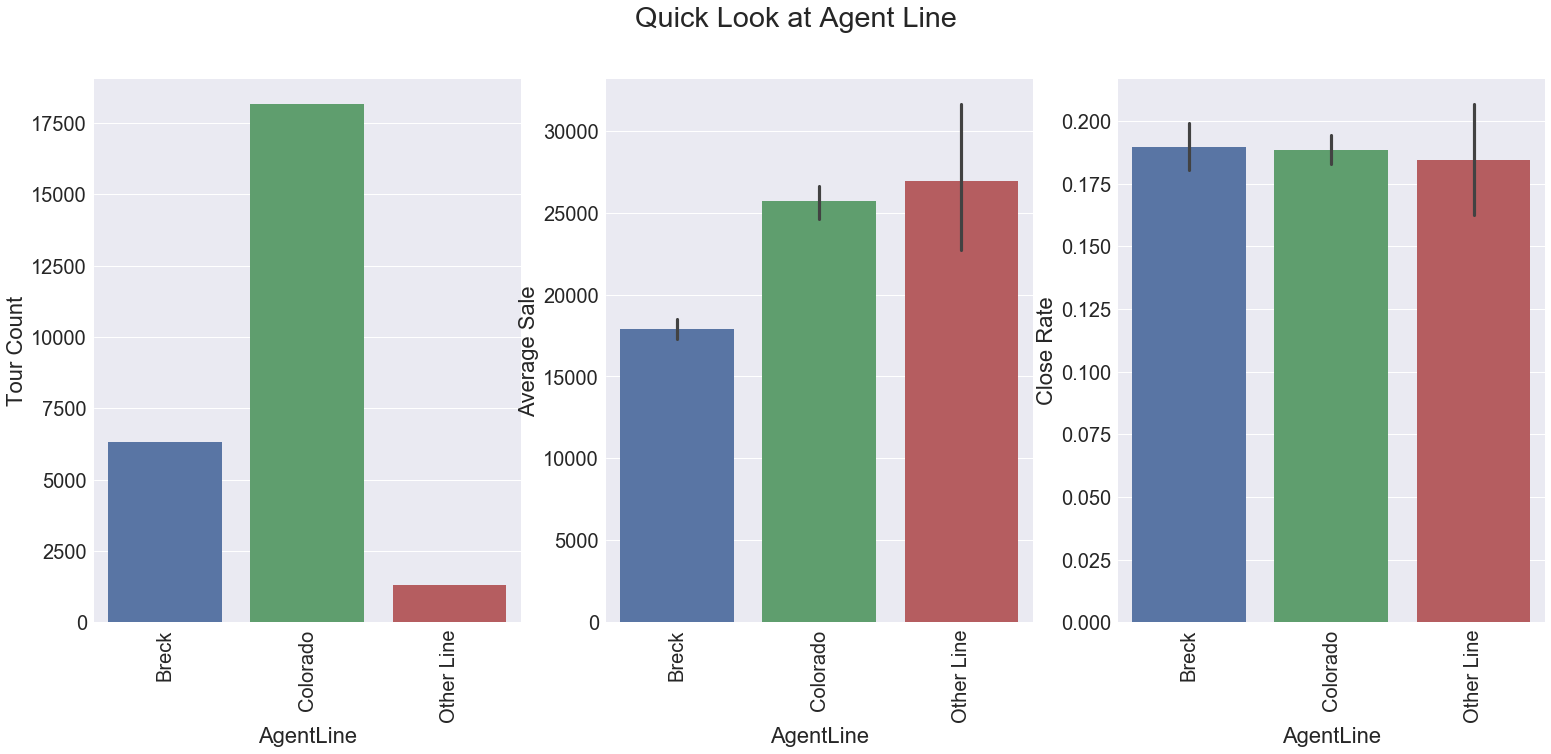

Breck vs Colorado and Other Lines Differences in Average Sale
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -11355.608 : -4402.428 )

Breck vs Colorado and Other Lines Differences in Close Rate
Probablility They Have Same Mean:  0.81898
Range of True Difference in Means: ( -0.021 : 0.024 )
---------------------------------------------------------------------


In [7]:
# create countplot of tours by agent line
plt.subplot(1,3,1)
sns.countplot(x= 'AgentLine', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)

# create barplot of vpg by agent line
plt.subplot(1,3,2)
sns.barplot(x= 'AgentLine', y= 'NetVolumePlusNonGoodVolume', data = dfSale)
plt.xticks(rotation=90)
plt.ylabel('Average Sale')

#create barplot of close rate by agent line
plt.subplot(1,3,3)
sns.barplot(x= 'AgentLine', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Agent Line')
plt.show()



# create Breck Line and Other Line groups
dfBreck = df[df.AgentLine == 'Breck']
dfNotBreck = df[(df.AgentLine == 'Colorado') | (df.AgentLine == 'Other Line')]

dfBreckS = dfSale[dfSale.AgentLine == 'Breck']
dfNotBreckS = dfSale[(dfSale.AgentLine == 'Colorado') | (dfSale.AgentLine == 'Other Line')]

# compare Breck Line and Other Line groups with z tests
print('Breck vs Colorado and Other Lines Differences in Average Sale')
zTest(df,dfBreckS,dfNotBreckS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Breck vs Colorado and Other Lines Differences in Close Rate')
zTest(df,dfBreck,dfNotBreck, 'ResultOfTour', alpha)
print('---------------------------------------------------------------------')

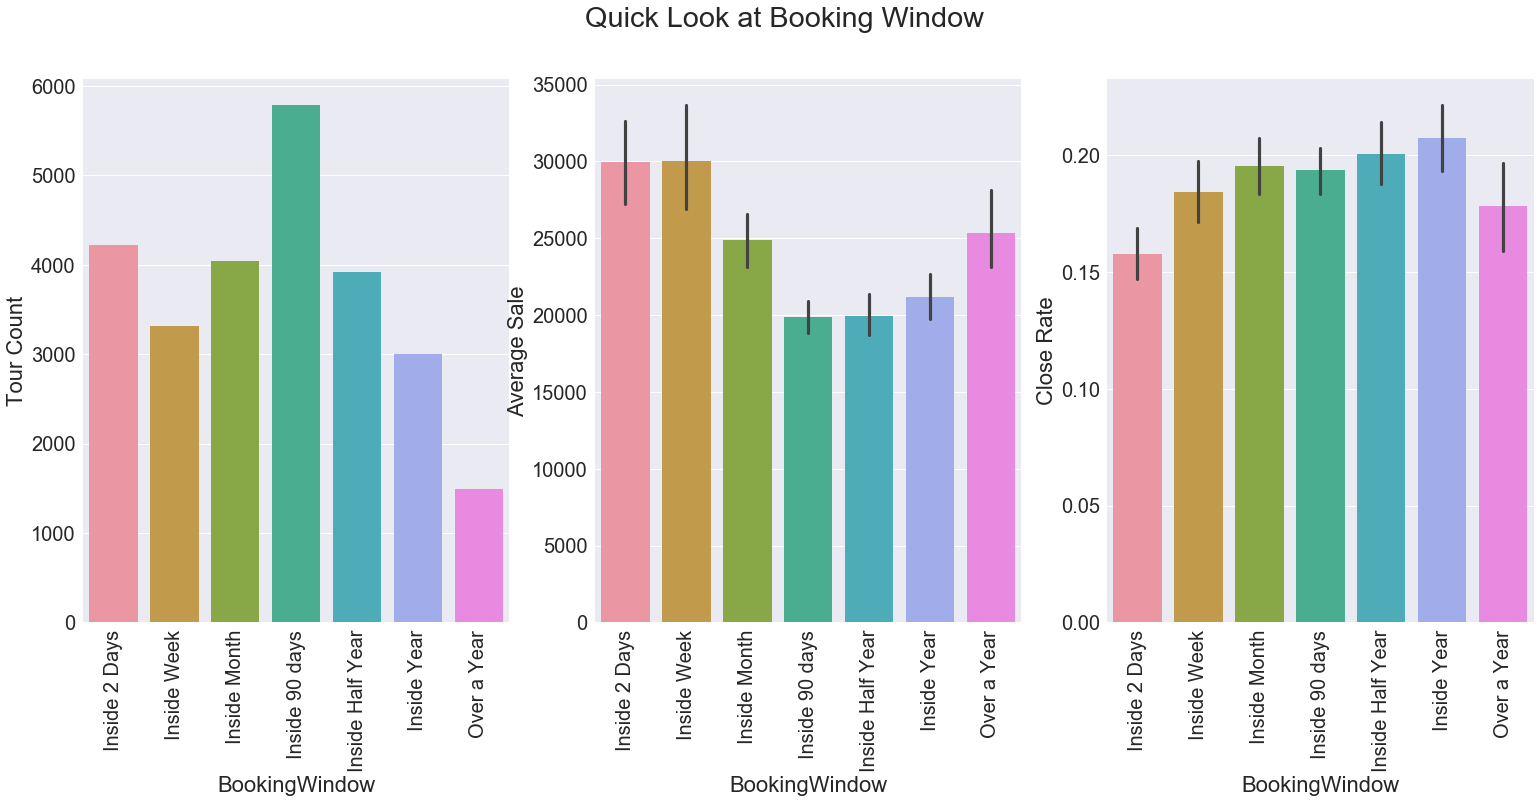

Booked Inside a Week vs Booked Ouside a Week Differences in Average Sale
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 4981.028 : 11777.197 )

Booked Inside a Week vs Booked Ouside a Week Differences in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -0.048 : -0.006 )

---------------------------------------------------------------------
Booked Inside a Month vs Booked Ouside a Month Differences in Average Sale
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 4325.331 : 10375.882 )

Booked Inside a Month vs Booked Ouside a Month Differences in Close Rate
Probablility They Have Same Mean:  0.00018
Range of True Difference in Means: ( -0.038 : 0.001 )

---------------------------------------------------------------------
Booked Inside 90 Days vs Booked Ouside 90 days Differences in

In [8]:
# create countplot of tour count by booking window
plt.subplot(1,3,1)
sns.countplot(x= 'BookingWindow', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

# create barplot for vpg by booking window
plt.subplot(1,3,2)
sns.barplot(x= 'BookingWindow',y = 'NetVolumePlusNonGoodVolume', data = dfSale,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Average Sale')

# create barplot for close rate by booking window
plt.subplot(1,3,3)
sns.barplot(x= 'BookingWindow',y = 'ResultOfTour', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Booking Window')
plt.show()

#Booked within a week Versus booked outside a week z test
dfInsideWeek = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')]
dfOutsideWeek = df[(df.BookingWindow == 'Inside 90 days')|(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')|(df.BookingWindow == 'Inside Month')]

#Booked within a week Versus booked outside a week z test
dfInsideWeekS = dfSale[(dfSale.BookingWindow == 'Inside 2 Days')|(dfSale.BookingWindow == 'Inside Week')]
dfOutsideWeekS = dfSale[(dfSale.BookingWindow == 'Inside 90 days')|(dfSale.BookingWindow == 'Inside Half Year')|(dfSale.BookingWindow == 'Inside Year')|(dfSale.BookingWindow == 'Over a Year')|(dfSale.BookingWindow == 'Inside Month')]

print('Booked Inside a Week vs Booked Ouside a Week Differences in Average Sale')
zTest(df,dfInsideWeekS,dfOutsideWeekS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside a Week vs Booked Ouside a Week Differences in Close Rate')
zTest(df,dfInsideWeek,dfOutsideWeek, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

#Booked within a month Versus booked outside a month z test
dfInsideMonth = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')|(df.BookingWindow == 'Inside Month')]
dfOutsideMonth = df[(df.BookingWindow == 'Inside 90 days')|(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')]

dfInsideMonthS = dfSale[(dfSale.BookingWindow == 'Inside 2 Days')|(dfSale.BookingWindow == 'Inside Week')|(dfSale.BookingWindow == 'Inside Month')]
dfOutsideMonthS = dfSale[(dfSale.BookingWindow == 'Inside 90 days')|(dfSale.BookingWindow == 'Inside Half Year')|(dfSale.BookingWindow == 'Inside Year')|(dfSale.BookingWindow == 'Over a Year')]

print('Booked Inside a Month vs Booked Ouside a Month Differences in Average Sale')
zTest(df,dfInsideMonthS,dfOutsideMonthS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside a Month vs Booked Ouside a Month Differences in Close Rate')
zTest(df,dfInsideMonth,dfOutsideMonth, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

#Booked within 90 days Versus booked outside 90 days z test
dfInside90 = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')|(df.BookingWindow == 'Inside Month')|(df.BookingWindow == 'Inside 90 days')]
dfOutside90 = df[(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')]

dfInside90S = dfSale[(dfSale.BookingWindow == 'Inside 2 Days')|(dfSale.BookingWindow == 'Inside Week')|(dfSale.BookingWindow == 'Inside Month')|(dfSale.BookingWindow == 'Inside 90 days')]
dfOutside90S = dfSale[(dfSale.BookingWindow == 'Inside Half Year')|(dfSale.BookingWindow == 'Inside Year')|(dfSale.BookingWindow == 'Over a Year')]

print('Booked Inside 90 Days vs Booked Ouside 90 days Differences in Average Sale')
zTest(df,dfInside90S,dfOutside90S, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside 90 Days vs Booked Ouside 90 days Differences in Close Rate')
zTest(df,dfInside90,dfOutside90, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

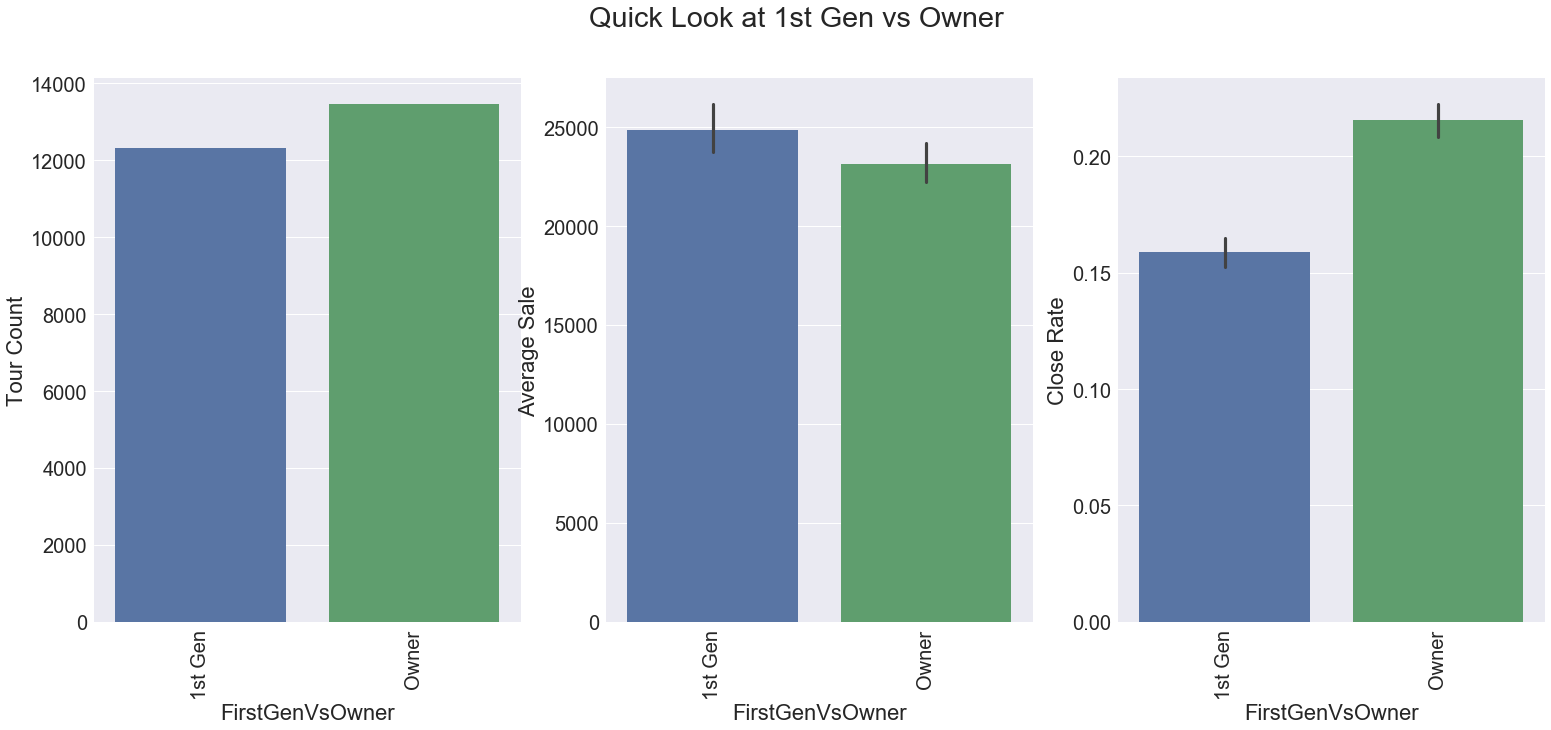

Owner Versus First Gen True Difference in Average Sale
Probablility They Have Same Mean:  0.02989
Range of True Difference in Means: ( -4772.836 : 1379.992 )

Owner Versus First Gen True Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.038 : 0.076 )

---------------------------------------------------------------------


In [9]:
# create countplot of tour count by first gen vs owner
plt.subplot(1,3,1)
sns.countplot(x= 'FirstGenVsOwner', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)

# create barplot of vpg by first gen vs owner
plt.subplot(1,3,2)
sns.barplot(x= 'FirstGenVsOwner',y = 'NetVolumePlusNonGoodVolume', data = dfSale)
plt.xticks(rotation=90)
plt.ylabel('Average Sale')

# create barplot of close rate by first gen vs owner
plt.subplot(1,3,3)
sns.barplot(x= 'FirstGenVsOwner',y = 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at 1st Gen vs Owner')
plt.show()

#bgv owner vs first gen z test
dfOwner = df[df.FirstGenVsOwner == 'Owner']
dfFirstGen = df[df.FirstGenVsOwner == '1st Gen']

dfOwnerS = dfSale[dfSale.FirstGenVsOwner == 'Owner']
dfFirstGenS = dfSale[dfSale.FirstGenVsOwner == '1st Gen']

print('Owner Versus First Gen True Difference in Average Sale')
zTest(df,dfOwnerS,dfFirstGenS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Owner Versus First Gen True Difference in Close Rate')
zTest(df,dfOwner,dfFirstGen, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

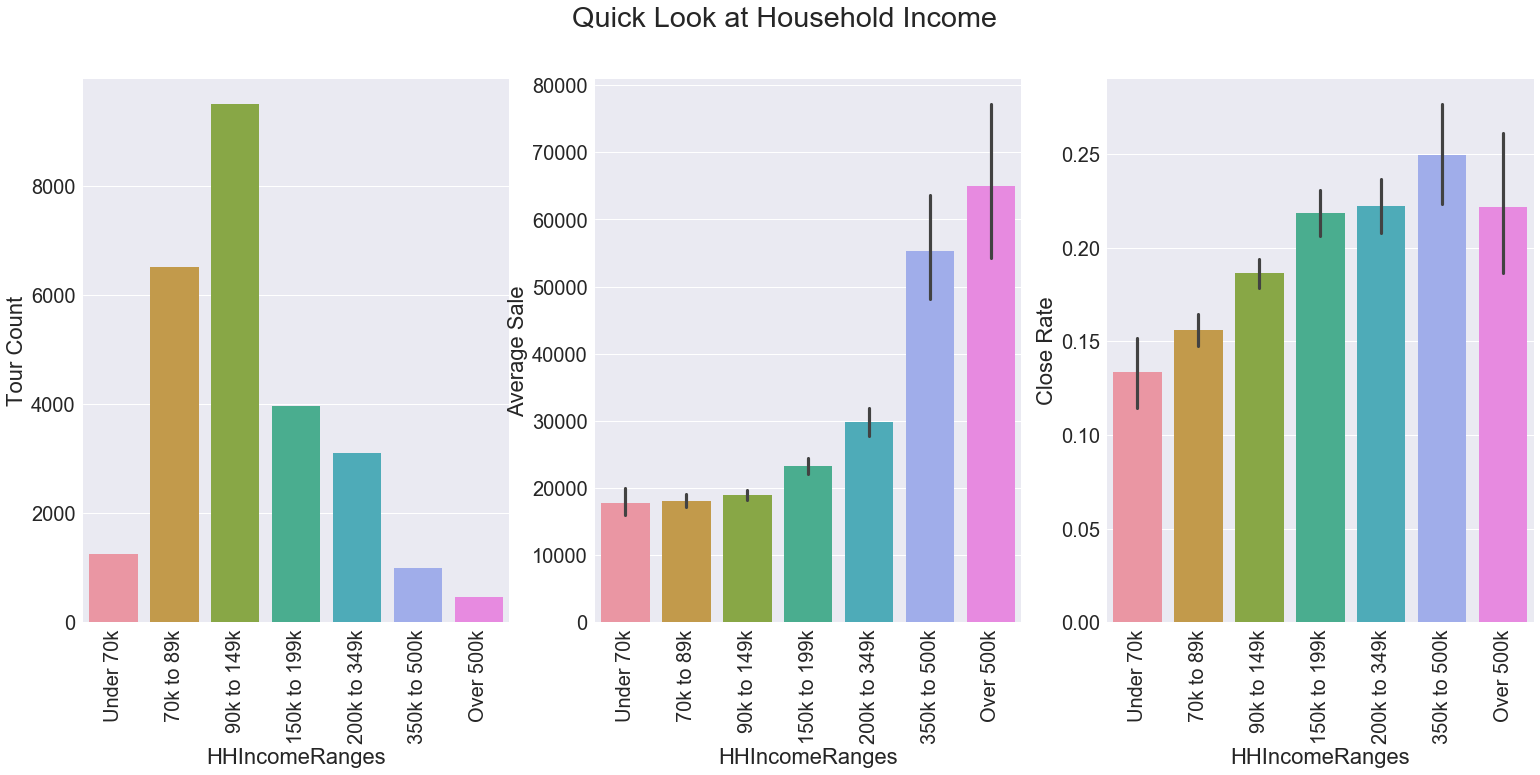

HHI over 350k vs HHI Under 350k Differences in Average Sale
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 31483.318 : 42403.684 )

HHI over 350k vs HHI Under 350k Differences in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.014 : 0.097 )

---------------------------------------------------------------------


In [10]:
#create countplot of tour count for HHIRanges
plt.subplot(1,3,1)
sns.countplot(x= 'HHIncomeRanges', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by HHIRanges
plt.subplot(1,3,2)
sns.barplot(x='HHIncomeRanges',y ='NetVolumePlusNonGoodVolume', data = dfSale, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Average Sale')

#create barplot of close rate by HHIRanges
plt.subplot(1,3,3)
sns.barplot(x='HHIncomeRanges',y ='ResultOfTour', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Household Income')
plt.show()



#HHI over 350 Versus HHI Under 350 days z test
dfNotHHI350 = df[(df.HHIncomeRanges == 'Under 70k')|(df.HHIncomeRanges == '70k to 89k')|(df.HHIncomeRanges == '90k to 149k')|(df.HHIncomeRanges == '150k to 199k')|(df.HHIncomeRanges == '200k to 349k')]
dfHHI350 = df[(df.HHIncomeRanges == '350k to 500k')|(df.HHIncomeRanges == 'Over 500k')]

#HHI over 350 Versus HHI Under 350 days z test
dfNotHHI350S = dfSale[(dfSale.HHIncomeRanges == 'Under 70k')|(dfSale.HHIncomeRanges == '70k to 89k')|(dfSale.HHIncomeRanges == '90k to 149k')|(dfSale.HHIncomeRanges == '150k to 199k')|(dfSale.HHIncomeRanges == '200k to 349k')]
dfHHI350S = dfSale[(dfSale.HHIncomeRanges == '350k to 500k')|(dfSale.HHIncomeRanges == 'Over 500k')]

print('HHI over 350k vs HHI Under 350k Differences in Average Sale')
zTest(df,dfHHI350S,dfNotHHI350S, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('HHI over 350k vs HHI Under 350k Differences in Close Rate')
zTest(df,dfHHI350,dfNotHHI350, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

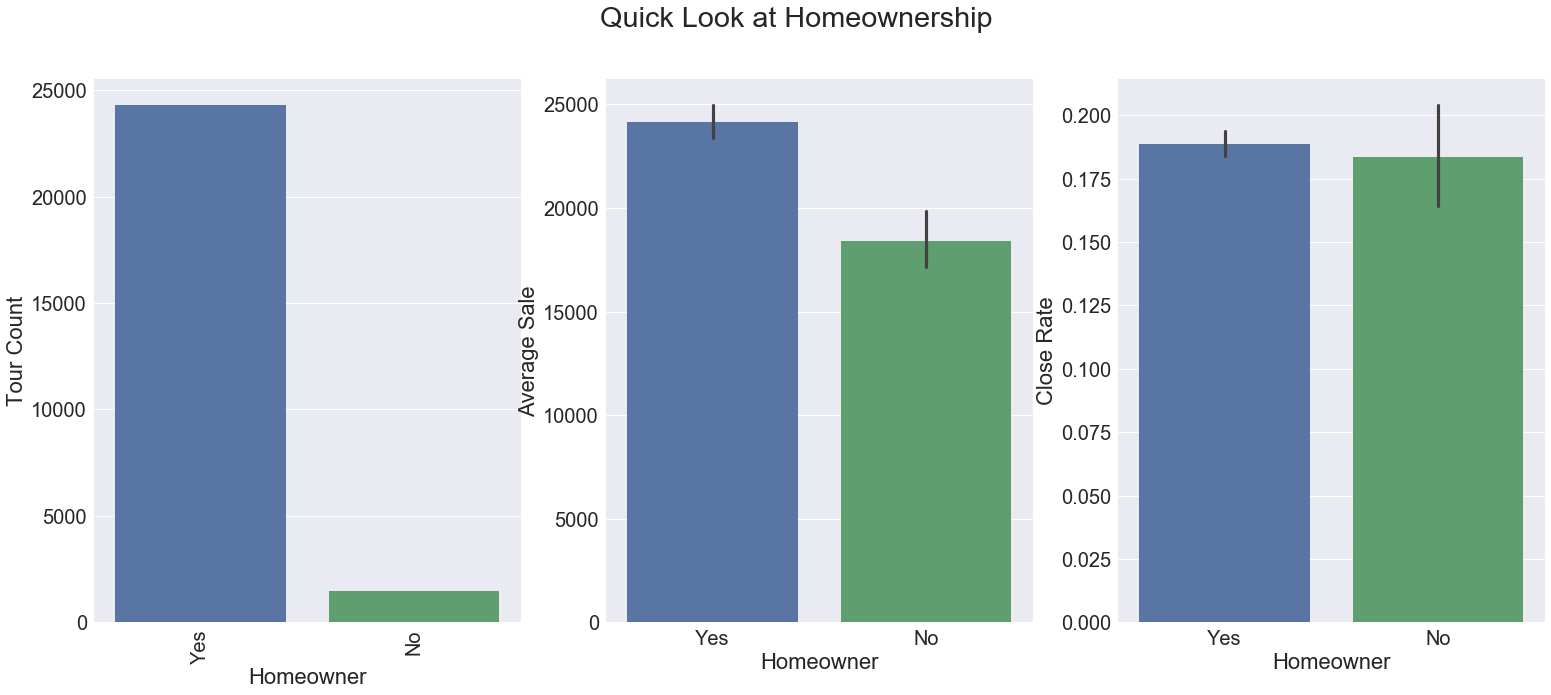

Homeowner Versus Non Homeowner True Difference in VPG
Probablility They Have Same Mean:  0.00061
Range of True Difference in Means: ( -857.324 : 12373.432 )

Homeowner Versus Non Homeowner True Difference in Close Rate
Probablility They Have Same Mean:  0.62774
Range of True Difference in Means: ( -0.036 : 0.047 )

---------------------------------------------------------------------


In [11]:
plt.subplot(1,3,1)
sns.countplot(x= 'Homeowner', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(y= 'NetVolumePlusNonGoodVolume', x='Homeowner', data= dfSale)
plt.ylabel('Average Sale')
plt.subplot(1,3,3)
sns.barplot(y= 'ResultOfTour', x='Homeowner', data= df)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Homeownership')
plt.show()

#homeowner z test
dfHY = df[df.Homeowner == 'Yes']
dfHN = df[df.Homeowner == 'No']

dfHYS = dfSale[dfSale.Homeowner == 'Yes']
dfHNS = dfSale[dfSale.Homeowner == 'No']

print('Homeowner Versus Non Homeowner True Difference in VPG')
zTest(df,dfHYS,dfHNS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Homeowner Versus Non Homeowner True Difference in Close Rate')
zTest(df,dfHY,dfHN, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

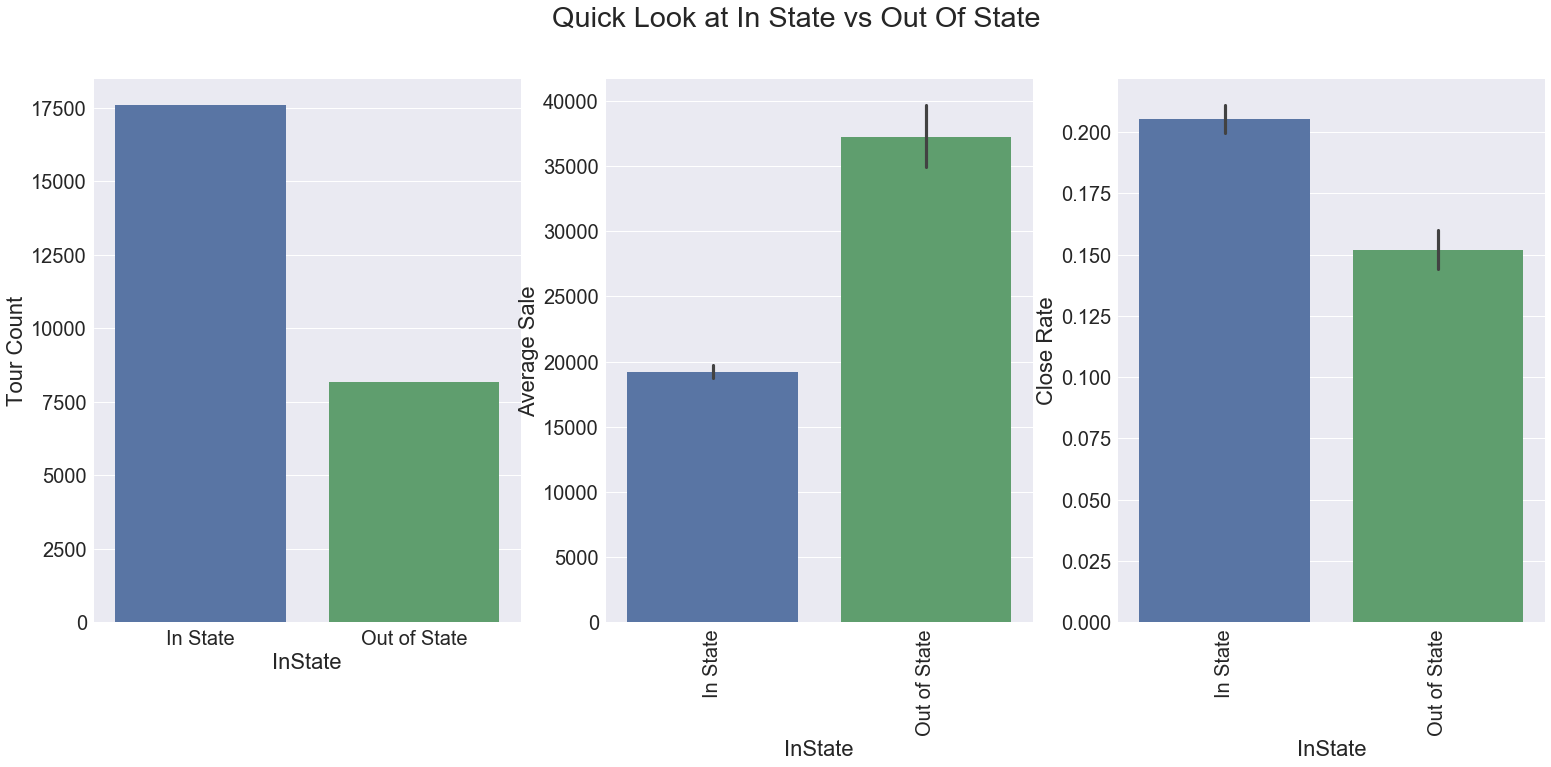

In State Versus Out of State True Difference in Average Sale
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -21321.791 : -14703.569 )

In State Versus Out of State True Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.033 : 0.074 )

---------------------------------------------------------------------


In [12]:
# instate quick look
plt.subplot(1,3,1)
sns.countplot(x= 'InState', data = df)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'InState', y='NetVolumePlusNonGoodVolume', data = dfSale)
plt.xticks(rotation=90)
plt.ylabel('Average Sale')
plt.subplot(1,3,3)
sns.barplot(x= 'InState', y='ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at In State vs Out Of State')
plt.show()


#in state vs out of state status z test
dfIn = df[df.InState == 'In State']
dfOut = df[df.InState == 'Out of State']

dfInS = dfSale[dfSale.InState == 'In State']
dfOutS = dfSale[dfSale.InState == 'Out of State']

print('In State Versus Out of State True Difference in Average Sale')
zTest(df,dfInS,dfOutS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('In State Versus Out of State True Difference in Close Rate')
zTest(df,dfIn,dfOut, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

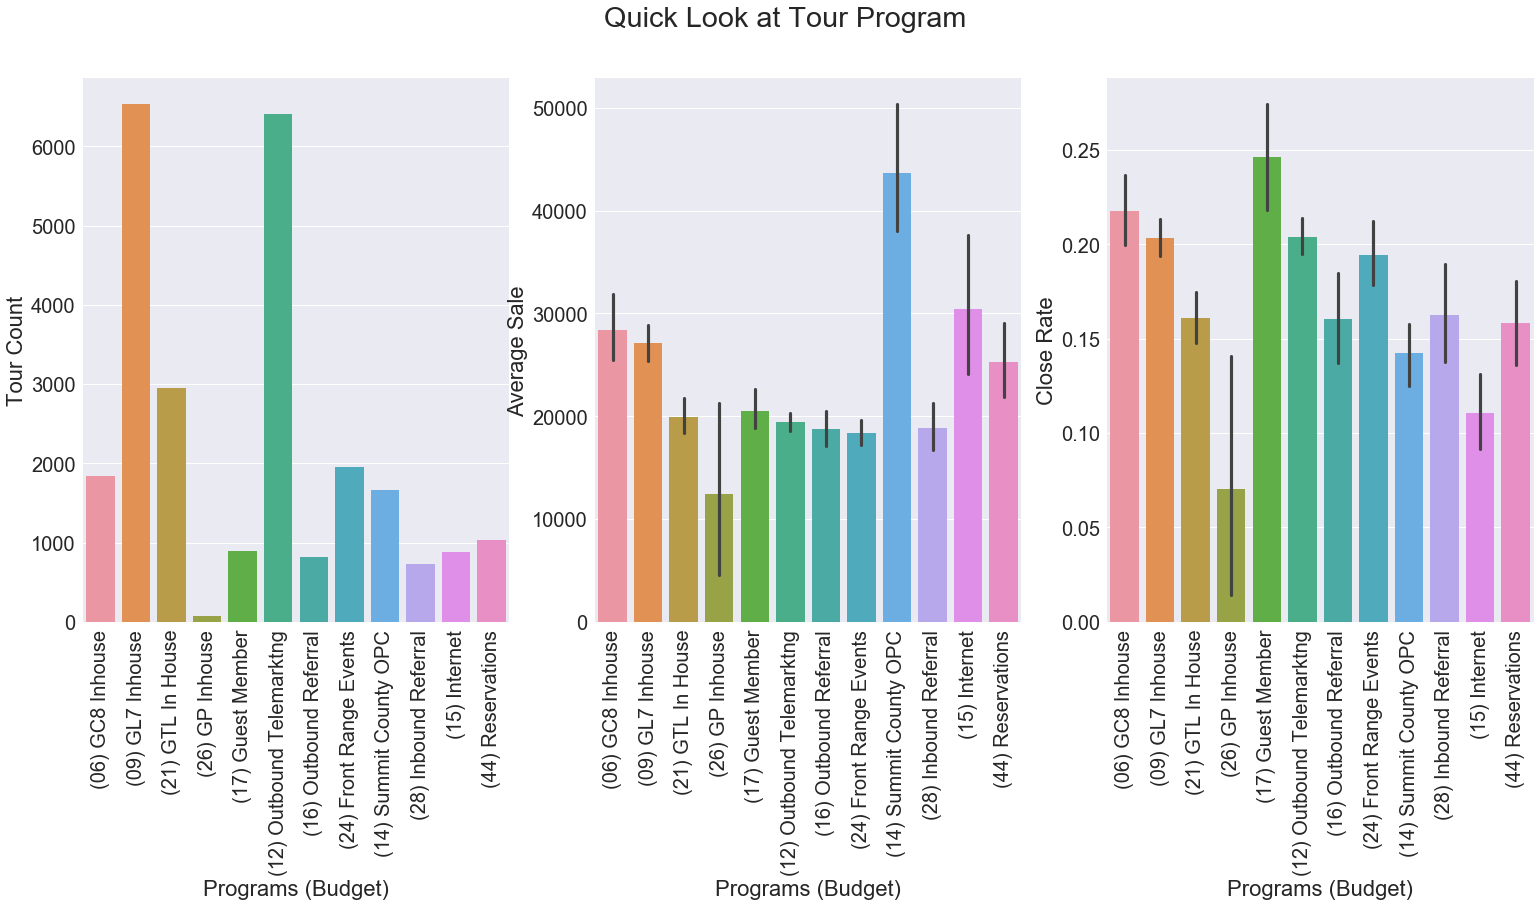

Inhouse programs  vs Non inhouse programs difference in Average Sale
Probablility They Have Same Mean:  0.00015
Range of True Difference in Means: ( -109.196 : 5919.849 )

Inhouse programs  vs Non inhouse programs difference in Close Rate
Probablility They Have Same Mean:  0.00042
Range of True Difference in Means: ( -0.002 : 0.036 )

---------------------------------------------------------------------


In [13]:
plt.subplot(1,3,1)
sns.countplot(x= 'Programs (Budget)', data = df, order = ['(06) GC8 Inhouse','(09) GL7 Inhouse','(21) GTL In House','(26) GP Inhouse','(17) Guest Member','(12) Outbound Telemarktng','(16) Outbound Referral','(24) Front Range Events','(14) Summit County OPC','(28) Inbound Referral','(15) Internet','(44) Reservations'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'Programs (Budget)', y = 'NetVolumePlusNonGoodVolume', data = dfSale, order = ['(06) GC8 Inhouse','(09) GL7 Inhouse','(21) GTL In House','(26) GP Inhouse','(17) Guest Member','(12) Outbound Telemarktng','(16) Outbound Referral','(24) Front Range Events','(14) Summit County OPC','(28) Inbound Referral','(15) Internet','(44) Reservations'])
plt.xticks(rotation=90)
plt.ylabel('Average Sale')
plt.subplot(1,3,3)
sns.barplot(x= 'Programs (Budget)', y = 'ResultOfTour', data = df, order = ['(06) GC8 Inhouse','(09) GL7 Inhouse','(21) GTL In House','(26) GP Inhouse','(17) Guest Member','(12) Outbound Telemarktng','(16) Outbound Referral','(24) Front Range Events','(14) Summit County OPC','(28) Inbound Referral','(15) Internet','(44) Reservations'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Tour Program')
plt.show()

#Inhouse programs  vs Non inhouse differnce in vpg z test
dfInhouse = df[(df['Programs (Budget)']=='(06) GC8 Inhouse')|(df['Programs (Budget)']=='(21) GTL In House')|(df['Programs (Budget)']=='(26) GP Inhouse')|(df['Programs (Budget)']=='(09) GL7 Inhouse')|(df['Programs (Budget)']=='(17) Guest Member')]
dfNotInhouse = df[(df['Programs (Budget)']=='(12) Outbound Telemarktng')|(df['Programs (Budget)']=='(16) Outbound Referral')|(df['Programs (Budget)']=='(24) Front Range Events')|(df['Programs (Budget)']=='(14) Summit County OPC')|(df['Programs (Budget)']=='(28) Inbound Referral')|(df['Programs (Budget)']=='(15) Internet')|(df['Programs (Budget)']=='(44) Reservations')]

dfInhouseS = dfSale[(dfSale['Programs (Budget)']=='(06) GC8 Inhouse')|(dfSale['Programs (Budget)']=='(21) GTL In House')|(dfSale['Programs (Budget)']=='(26) GP Inhouse')|(dfSale['Programs (Budget)']=='(09) GL7 Inhouse')|(dfSale['Programs (Budget)']=='(17) Guest Member')]
dfNotInhouseS = dfSale[(dfSale['Programs (Budget)']=='(12) Outbound Telemarktng')|(dfSale['Programs (Budget)']=='(16) Outbound Referral')|(dfSale['Programs (Budget)']=='(24) Front Range Events')|(dfSale['Programs (Budget)']=='(14) Summit County OPC')|(dfSale['Programs (Budget)']=='(28) Inbound Referral')|(dfSale['Programs (Budget)']=='(15) Internet')|(dfSale['Programs (Budget)']=='(44) Reservations')]


print('Inhouse programs  vs Non inhouse programs difference in Average Sale')
zTest(df,dfInhouseS,dfNotInhouseS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Inhouse programs  vs Non inhouse programs difference in Close Rate')
zTest(df,dfInhouse,dfNotInhouse, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

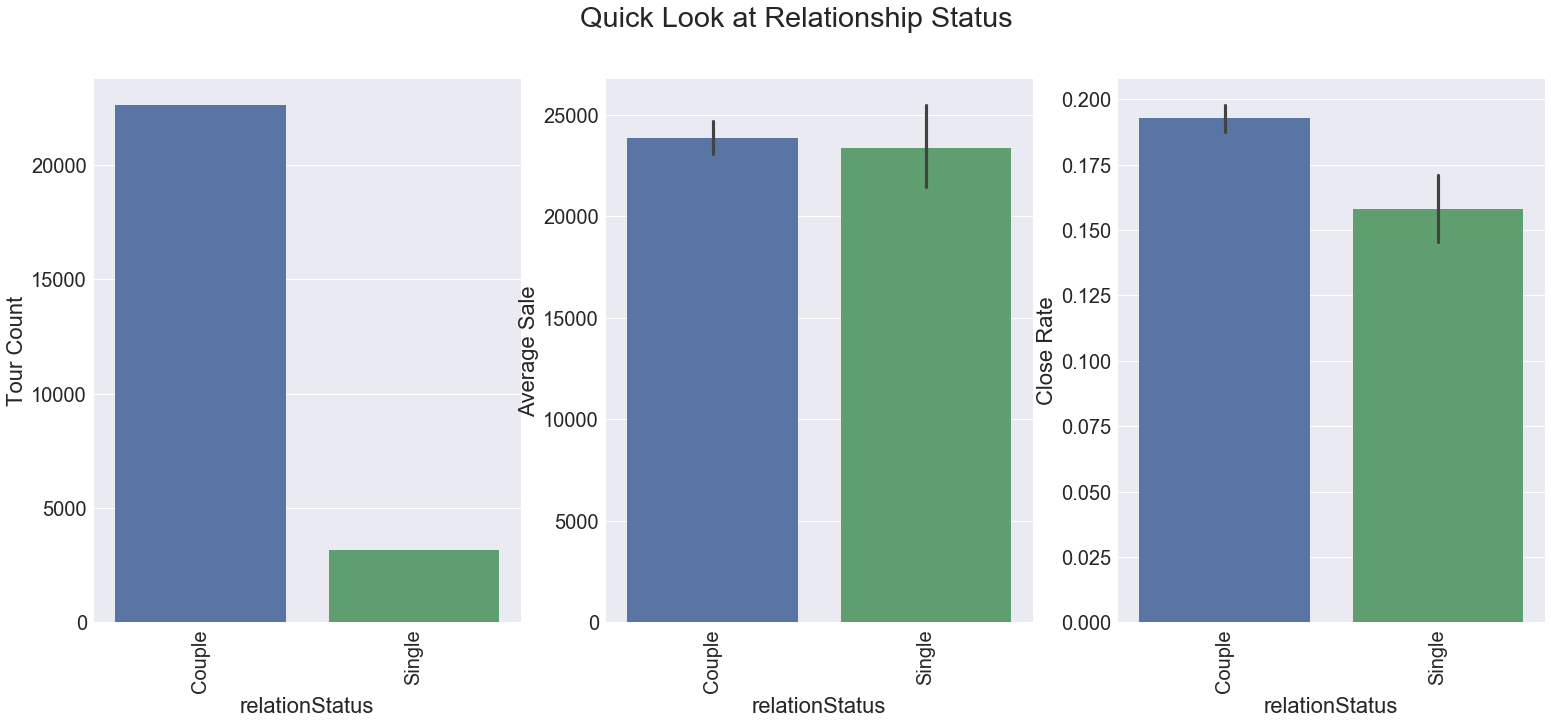

Couples Versus Singles Difference in Average Sale
Probablility They Have Same Mean:  0.67065
Range of True Difference in Means: ( -4446.992 : 5523.737 )

Couples Versus Singles Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.005 : 0.064 )

---------------------------------------------------------------------


In [14]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= 'relationStatus', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'relationStatus', y= 'NetVolumePlusNonGoodVolume', data = dfSale)
plt.xticks(rotation=90)
plt.ylabel('Average Sale')
plt.subplot(1,3,3)
sns.barplot(x= 'relationStatus', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Relationship Status')
plt.show()


#relationship status z test
dfCouple = df[df.relationStatus == 'Couple']
dfSingle = df[df.relationStatus == 'Single']

dfCoupleS = dfSale[dfSale.relationStatus == 'Couple']
dfSingleS = dfSale[dfSale.relationStatus == 'Single']

print('Couples Versus Singles Difference in Average Sale')
zTest(df,dfCoupleS,dfSingleS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Couples Versus Singles Difference in Close Rate')
zTest(df,dfCouple,dfSingle, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

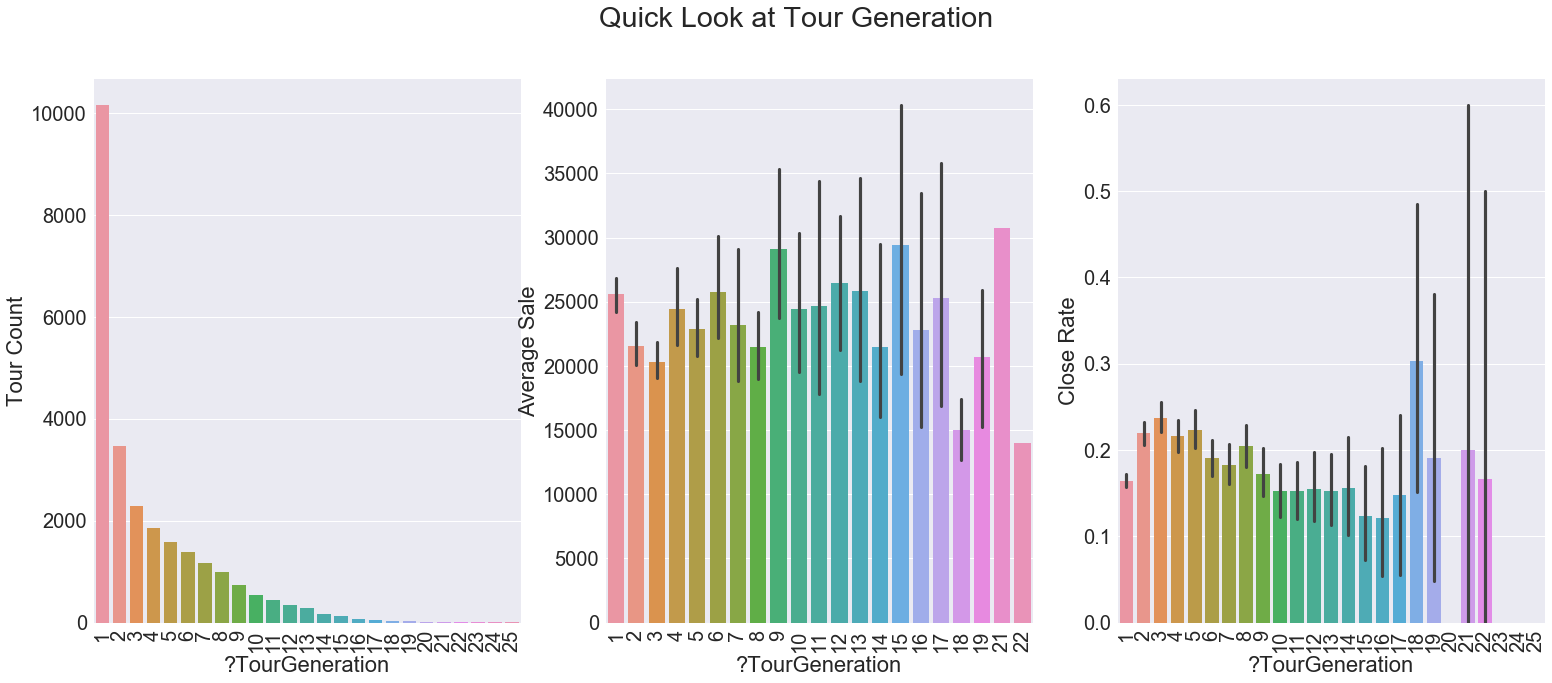

Under 2 Tour Vs Over 2 Tours Difference in Average Sale
Probablility They Have Same Mean:  0.00099
Range of True Difference in Means: ( -518.919 : 5830.245 )

Under 2 Tour Vs Over 2 Tours Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -0.059 : -0.02 )

---------------------------------------------------------------------


In [15]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= '?TourGeneration', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= '?TourGeneration', y= 'NetVolumePlusNonGoodVolume', data = dfSale)
plt.xticks(rotation=90)
plt.ylabel('Average Sale')
plt.subplot(1,3,3)
sns.barplot(x= '?TourGeneration', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Tour Generation')
plt.show()


#TourGeneration status z test
dfUnder5 = df[df['?TourGeneration']<2]
dfAbove5 = df[df['?TourGeneration']>=2]

dfUnder5S = dfSale[dfSale['?TourGeneration']<2]
dfAbove5S = dfSale[dfSale['?TourGeneration']>=2]

print('Under 2 Tour Vs Over 2 Tours Difference in Average Sale')
zTest(df,dfUnder5S,dfAbove5S, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Under 2 Tour Vs Over 2 Tours Difference in Close Rate')
zTest(df,dfUnder5,dfAbove5, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')


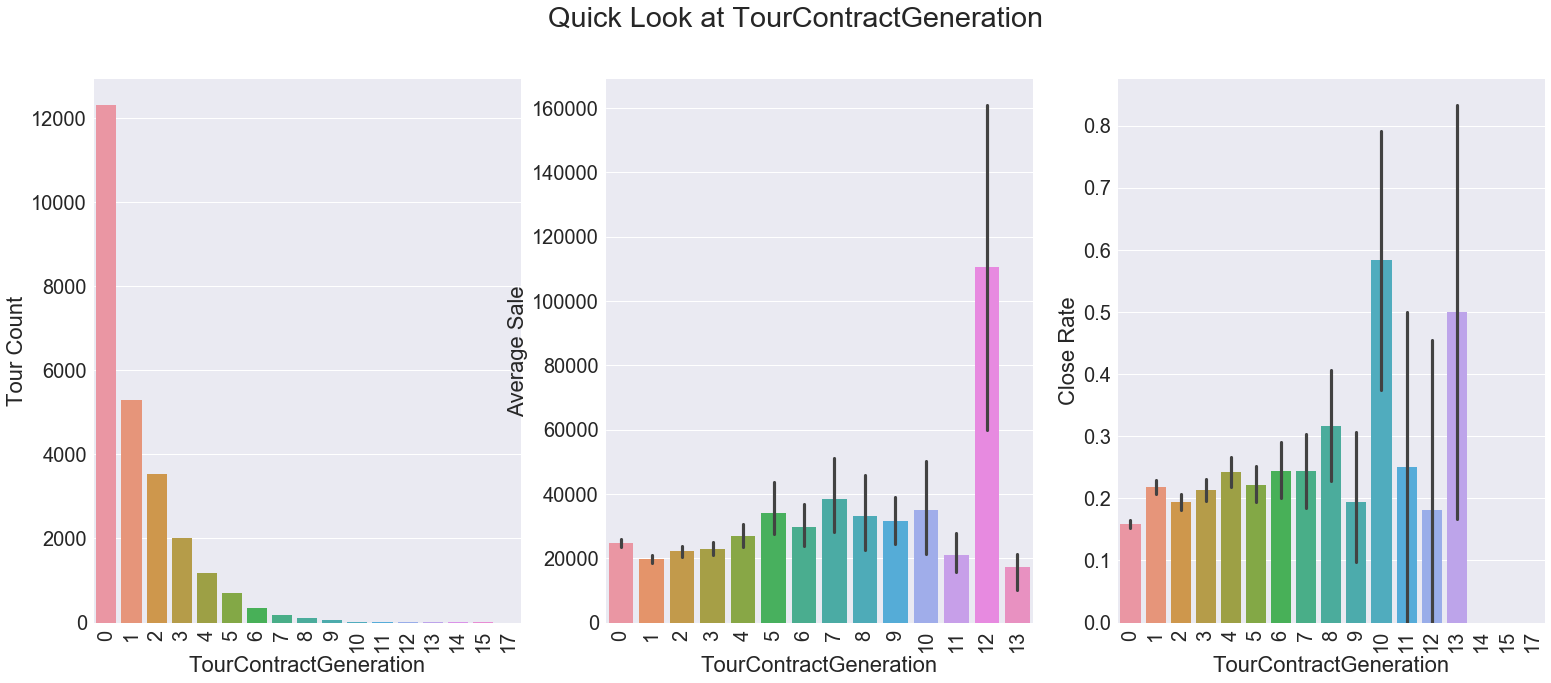

Under 2 Contracts Vs 2 or more Contracts Difference in Average Sale
Probablility They Have Same Mean:  0.00228
Range of True Difference in Means: ( -5575.352 : 707.303 )

Under 2 Contracts Vs 2 or more Contracts Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -0.058 : -0.017 )

---------------------------------------------------------------------


In [16]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= 'TourContractGeneration', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'TourContractGeneration', y= 'NetVolumePlusNonGoodVolume', data = dfSale)
plt.xticks(rotation=90)
plt.ylabel('Average Sale')
plt.subplot(1,3,3)
sns.barplot(x= 'TourContractGeneration', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at TourContractGeneration')
plt.show()


#TourContractGeneration status z test
dfUnder3C = df[df['TourContractGeneration']<2]
dfAbove3C = df[df['TourContractGeneration']>=2]

dfUnder3CS = dfSale[dfSale['TourContractGeneration']<2]
dfAbove3CS = dfSale[dfSale['TourContractGeneration']>=2]
             
print('Under 2 Contracts Vs 2 or more Contracts Difference in Average Sale')
zTest(df,dfUnder3CS,dfAbove3CS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Under 2 Contracts Vs 2 or more Contracts Difference in Close Rate')
zTest(df,dfUnder3C,dfAbove3C, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')


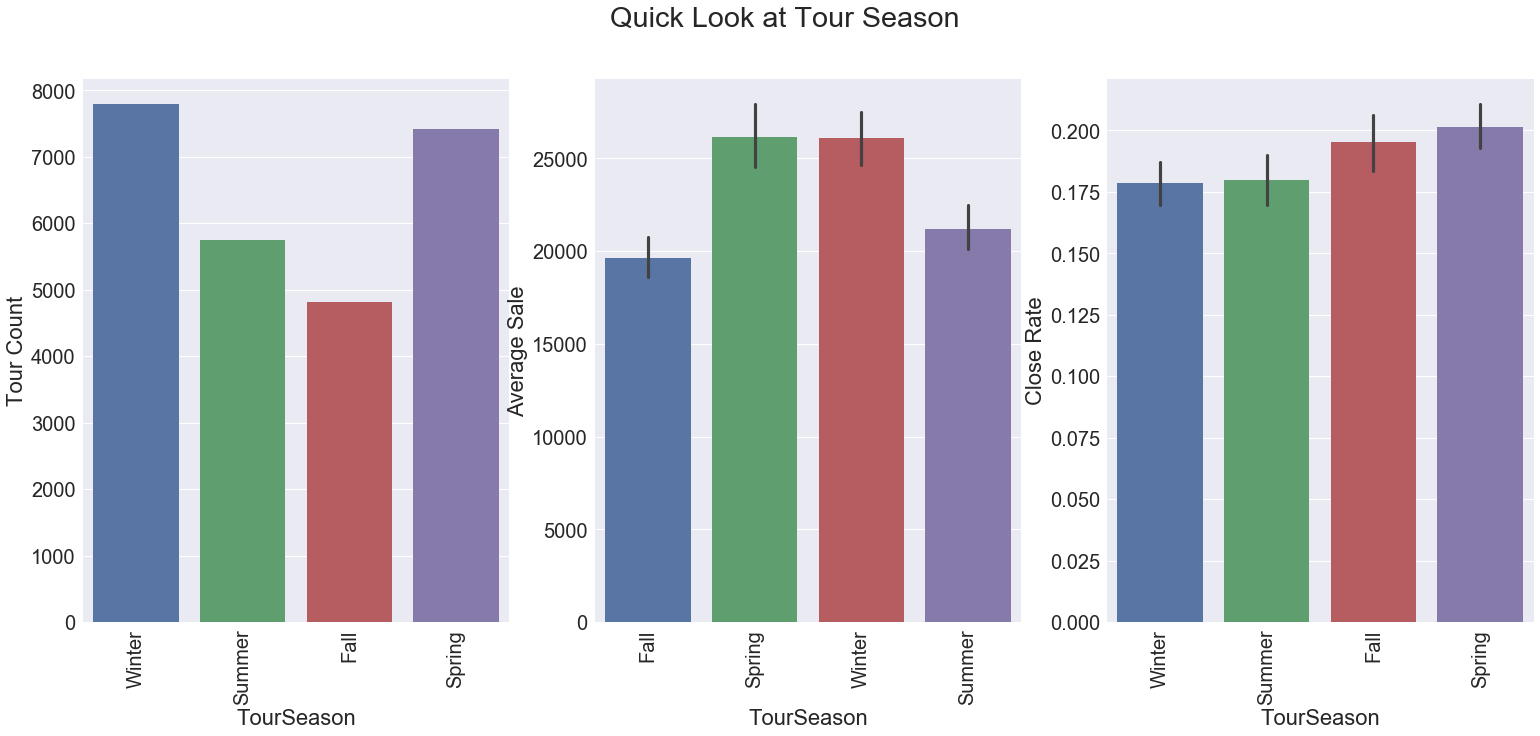

Winter/Spring Vs Summer/Fall Tours Difference in Average Sale
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 2640.412 : 8753.373 )

Winter/Spring Vs Summer/Fall Tours Difference in Close Rate
Probablility They Have Same Mean:  0.55892
Range of True Difference in Means: ( -0.017 : 0.022 )

---------------------------------------------------------------------


In [17]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= 'TourSeason', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'TourSeason', y= 'NetVolumePlusNonGoodVolume', data = dfSale)
plt.xticks(rotation=90)
plt.ylabel('Average Sale')
plt.subplot(1,3,3)
sns.barplot(x= 'TourSeason', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Tour Season')
plt.show()


#Tour Season z test
dfWSp = df[(df['TourSeason']=='Winter')| (df['TourSeason']=='Spring')]
dfSF = df[(df['TourSeason']=='Summer')| (df['TourSeason']=='Fall')]

dfWSpS = dfSale[(dfSale['TourSeason']=='Winter')| (dfSale['TourSeason']=='Spring')]
dfSFS = dfSale[(dfSale['TourSeason']=='Summer')| (dfSale['TourSeason']=='Fall')]
             
print('Winter/Spring Vs Summer/Fall Tours Difference in Average Sale')
zTest(df,dfWSpS,dfSFS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Winter/Spring Vs Summer/Fall Tours Difference in Close Rate')
zTest(df,dfWSp,dfSF, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')



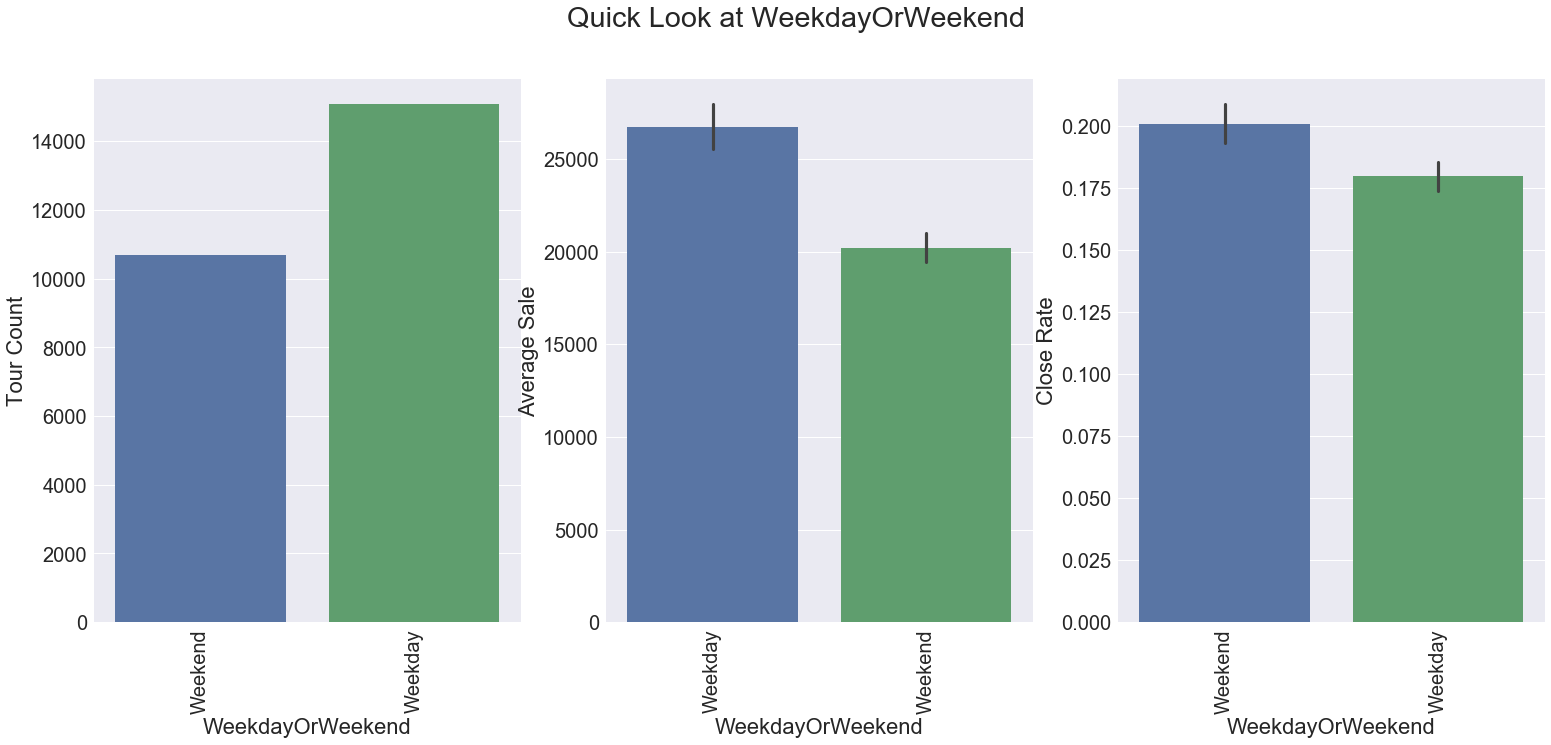

Weekend Or Weekday Tours Difference in Average Sale
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 3511.696 : 9545.533 )

Weekend Or Weekday Tours Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  2e-05
Range of True Difference in Means: ( -0.04 : -0.001 )

---------------------------------------------------------------------


In [18]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= 'WeekdayOrWeekend', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'WeekdayOrWeekend', y= 'NetVolumePlusNonGoodVolume', data = dfSale)
plt.xticks(rotation=90)
plt.ylabel('Average Sale')
plt.subplot(1,3,3)
sns.barplot(x= 'WeekdayOrWeekend', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at WeekdayOrWeekend')
plt.show()

#WeekendOrWeekday z test
dfWeekday = df[(df['WeekdayOrWeekend']=='Weekday')]
dfWeekend = df[(df['WeekdayOrWeekend']=='Weekend')]

dfWeekdayS = dfSale[(dfSale['WeekdayOrWeekend']=='Weekday')]
dfWeekendS = dfSale[(dfSale['WeekdayOrWeekend']=='Weekend')]
             
print('Weekend Or Weekday Tours Difference in Average Sale')
zTest(df,dfWeekdayS,dfWeekendS, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Weekend Or Weekday Tours Difference in Close Rate')
zTest(df,dfWeekday,dfWeekend, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')
